## EDA Notebook

#### Dataset Overview

- Each row = one hospital encounter (admission) of a patient with diabetes.
- Goal: Predict whether a patient will be readmitted to the hospital.
- The dataset includes demographics, admission details, diagnostics, lab results, and medications.

## importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading csv file

In [2]:
data_path = "E:\\Hospital_Readmission_Prediction\\data\\raw\\diabetic_data.csv"
data = pd.read_csv(data_path)

In [3]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### columns names -> their meanings and importance in predictions

In [4]:
print(data.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


## This insights are taken from given dataset source (website)

### `encounter_id`
- Unique identifier for each hospital encounter.  
- This column doesn’t carry predictive value.

### `patient_nbr`
- Represents a unique patient number across multiple visits.  
- It helps track repeated admissions but isn’t used directly for prediction.

### `race`
- Indicates the patient’s race, such as Caucasian or African-American.  
- It can show demographic trends or disparities in readmission rates.

### `gender`
- Represents the patient’s gender.  
- Can help understand differences in disease management and outcomes.

### `age`
- Shows the age group of the patient in ranges.  
- Older age groups are more prone to readmission due to chronic conditions.

### `weight`
- Indicates the patient’s body weight, often missing in the dataset.  
- Useful for understanding obesity-related risks if available.

### `admission_type_id`
- Specifies the type of hospital admission like emergency or elective.  
- Emergency admissions are often associated with higher readmission rates.

### `discharge_disposition_id`
- Shows where the patient went after discharge, like home or nursing facility.  
- Strongly linked with readmission risk based on follow-up care needs.

### `admission_source_id`
- Tells how the patient was admitted, such as referral or emergency room.  
- Helps identify severity and patterns of patient inflow.

### `time_in_hospital`
- Represents the total days a patient stayed in the hospital.  
- Longer stays often indicate more severe illness and higher risk of readmission.

### `payer_code`
- Denotes the payment source or insurance provider.  
- May reflect socioeconomic status and access to healthcare resources.

### `medical_specialty`
- Shows the specialty of the admitting physician.  
- Different specialties face different rates of patient readmission.

### `num_lab_procedures`
- Number of lab tests conducted during the stay.  
- A high count often correlates with complex or severe cases.

### `num_procedures`
- Number of medical procedures performed during the encounter.  
- More procedures usually indicate more serious medical conditions.

### `num_medications`
- Number of unique medications prescribed.  
- A higher count can imply multiple comorbidities and treatment complexity.

### `number_outpatient`
- Outpatient visits made in the previous year.  
- Frequent outpatient visits can show ongoing management of chronic issues.

### `number_emergency`
- Number of emergency visits in the past year.  
- A strong indicator of unstable health and higher readmission chances.

### `number_inpatient`
- Number of inpatient admissions in the past year.  
- Recurrent admissions strongly suggest chronic or uncontrolled conditions.

### `diag_1, diag_2, diag_3`
- Primary, secondary, and tertiary diagnosis codes.  
- These represent main and related health issues influencing readmission.

### `number_diagnoses`
- Total number of diagnoses recorded for a patient.  
- Higher counts indicate multiple health problems and greater readmission risk.

### `max_glu_serum`
- Represents blood glucose test results such as normal or >200.  
- Useful in assessing short-term blood sugar control.

### `A1Cresult`
- Shows HbA1c test result indicating long-term glucose control.  
- Poor control is directly linked with increased readmission probability.

### `metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, etc.`
- Medication indicators for various diabetes drugs.  
- Changes or high variety in these medications can reveal unstable diabetes management.

### `insulin`
- Shows insulin dosage trend such as up, down, steady, or no use.  
- Insulin adjustments are often connected with unstable glucose levels.

### `glyburide-metformin, glipizide-metformin, and other combinations`
- Indicate the use of combination diabetes medications.  
- Can show treatment intensity and complexity of disease control.

### `change`
- Specifies whether there was a medication change during the encounter.  
- Frequent changes may signal poor control or complications.

### `diabetesMed`
- Shows if the patient was prescribed any diabetes medication.  
- Basic flag indicating active treatment for diabetes management.

### `readmitted`
- Target column representing readmission status (<30, >30, or NO).  
- Used as the prediction label for the classification task.


In [5]:
data.shape

(101766, 50)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

- This shows their are no nulls but in dataset nulls are `?`

In [11]:
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
print(data.nunique())

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

### Mapping target feature with binary classes (1,0)

In [8]:
data['readmitted'] = data['readmitted'].astype(str).str.strip().str.upper()
readmit = {'NO': 0, '>30': 0, '<30': 1}
data['readmitted'] = data['readmitted'].map(readmit)
data['readmitted'].value_counts()

readmitted
0    90409
1    11357
Name: count, dtype: int64

In [9]:
for column in data.columns:
    print(f"\nColumn: {column}")
    unique_vals = data[column].unique()
    print(unique_vals[:10])  # prints only first 10 unique values
    print(f"Total unique values: {len(unique_vals)}")


Column: encounter_id
[2278392  149190   64410  500364   16680   35754   55842   63768   12522
   15738]
Total unique values: 101766

Column: patient_nbr
[  8222157  55629189  86047875  82442376  42519267  82637451  84259809
 114882984  48330783  63555939]
Total unique values: 71518

Column: race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
Total unique values: 6

Column: gender
['Female' 'Male' 'Unknown/Invalid']
Total unique values: 3

Column: age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Total unique values: 10

Column: weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
Total unique values: 10

Column: admission_type_id
[6 1 2 3 4 5 8 7]
Total unique values: 8

Column: discharge_disposition_id
[25  1  3  6  2  5 11  7 10  4]
Total unique values: 26

Column: admission_source_id
[ 1  7  2  4  5  6 20  3 17  8]
Total unique values: 17

Column: time_in

- This shows all the nulls are `?`

In [10]:
# REPLACING ALL "?" WITH NaN
data.replace("?", np.nan, inplace=True)
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### Missing Values Summary

After replacing `'?'` with `NaN`, the dataset has missing values in several columns.  

- **race:** 2,273 missing values, indicating some patients’ race information is unknown.  
- **weight:** 98,569 missing values, showing that weight data is largely absent.  
- **payer_code:** 40,256 missing values, suggesting incomplete insurance/payment information.  
- **medical_specialty:** 49,949 missing values, as some admissions do not have a specialty recorded.  
- **diag_1:** 21 missing values, minor missing entries in primary diagnosis.  
- **diag_2:** 358 missing values, missing secondary diagnosis data.  
- **diag_3:** 1,423 missing values, missing tertiary diagnosis data.  
- **max_glu_serum:** 96,420 missing values, indicating missing glucose test results.  
- **A1Cresult:** 84,748 missing values, showing many patients do not have HbA1c recorded.  

All other columns have complete data and do not contain missing values.  

This information helps identify which features may require **imputation** or special handling before modeling.

### statistical Information

In [48]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

data[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


## Univariate Analysis 

- Making group of medication columns with 4 classes (No,steady,up,down)
        - No → The medication was not prescribed to that patient.

        - Steady → The medication was prescribed and the dosage remained unchanged.

        - Up → The dosage was increased during the stay.

        - Down → The dosage was decreased during the stay.

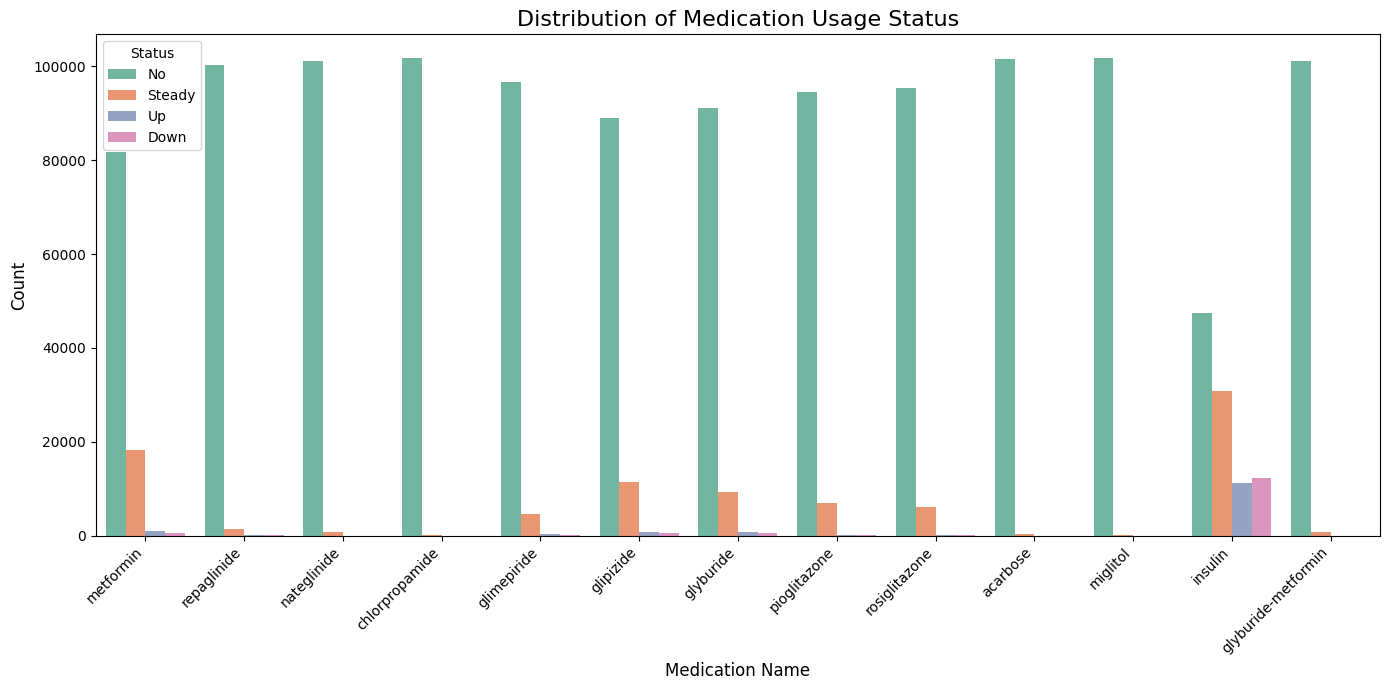

In [12]:
medication_columns_4 = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
    'glyburide-metformin'
]

# Melt the dataframe into long format
meds_melted = data[medication_columns_4].melt(var_name='Medication', value_name='Status')

# custom order for better readability
status_order = ['No', 'Steady', 'Up', 'Down']

# Plot
plt.figure(figsize=(14, 7))
sns.countplot(
    data=meds_melted,
    x='Medication',
    hue='Status',
    order=medication_columns_4,
    hue_order=status_order,
    palette='Set2'
)
plt.title('Distribution of Medication Usage Status', fontsize=16)
plt.xlabel('Medication Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

- Making gorup of medications with 2 values (No,steady)

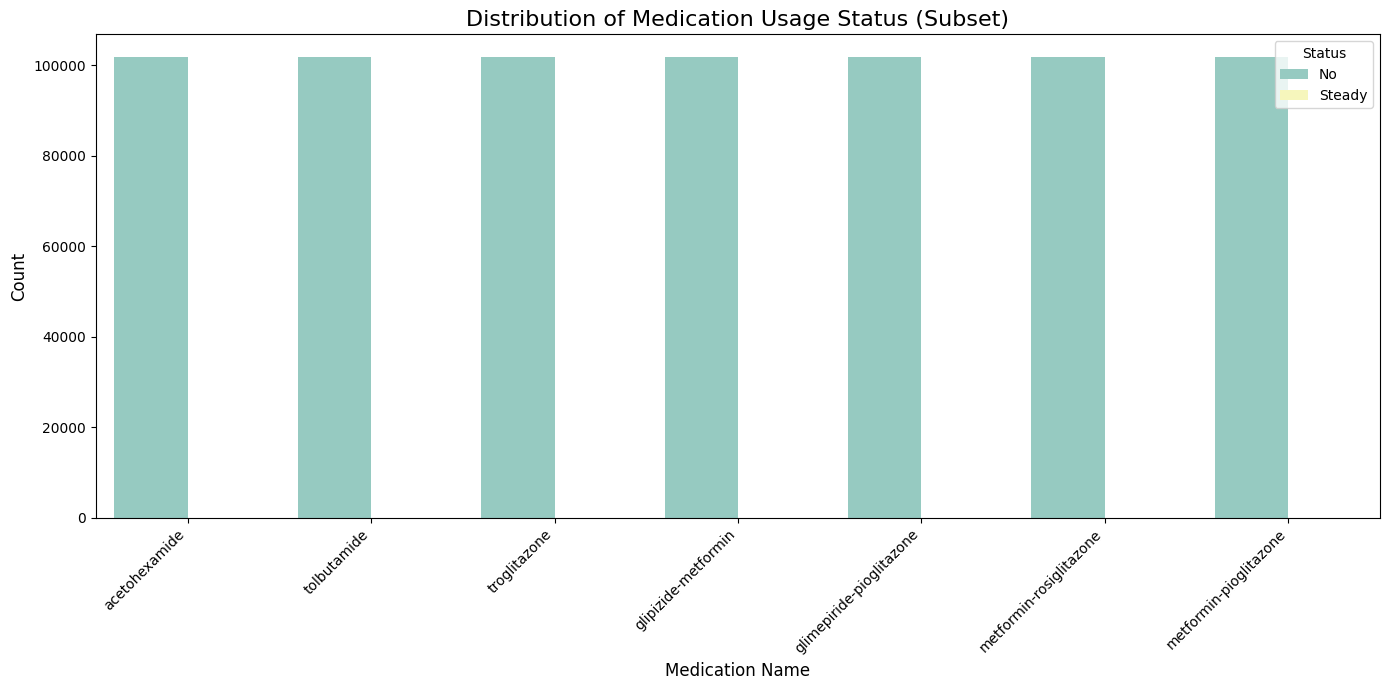

In [13]:
medication_columns_2 =  [
    'acetohexamide',
    'tolbutamide',
    'troglitazone',
    'glipizide-metformin',
    'glimepiride-pioglitazone',
    'metformin-rosiglitazone',
    'metformin-pioglitazone'
]

# Melt the dataframe into long format
meds_melted_2 = data[medication_columns_2].melt(var_name='Medication', value_name='Status')
status_order_2 = ['No', 'Steady']
# Plot
plt.figure(figsize=(14, 7))
sns.countplot(
    data=meds_melted_2,
    x='Medication',
    hue='Status',
    order=medication_columns_2,
    hue_order=status_order_2,
    palette='Set3'
)
plt.title('Distribution of Medication Usage Status (Subset)', fontsize=16)
plt.xlabel('Medication Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

- Label encoding is viable as it will preserves logical meaning of dosage.

#### Other categorical columns distribution

C:\Users\Dell\AppData\Local\Temp\ipykernel_28344\2758552033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='readmitted', palette='Set1')


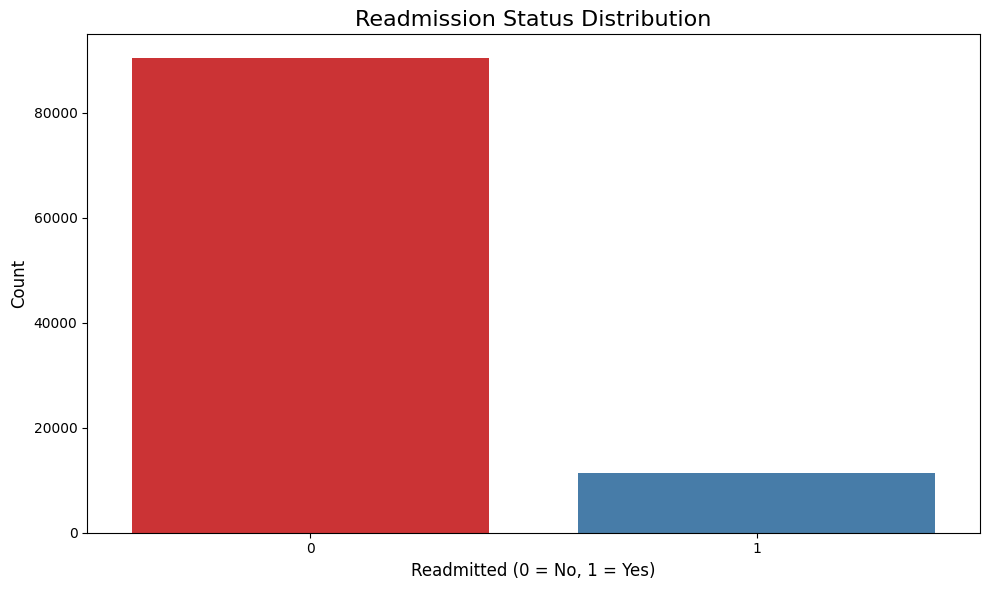

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='readmitted', palette='Set1')
plt.title('Readmission Status Distribution', fontsize=16)
plt.xlabel('Readmitted (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

- Data is highly unbalanced so oversampling is needed

C:\Users\Dell\AppData\Local\Temp\ipykernel_28344\2247744841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


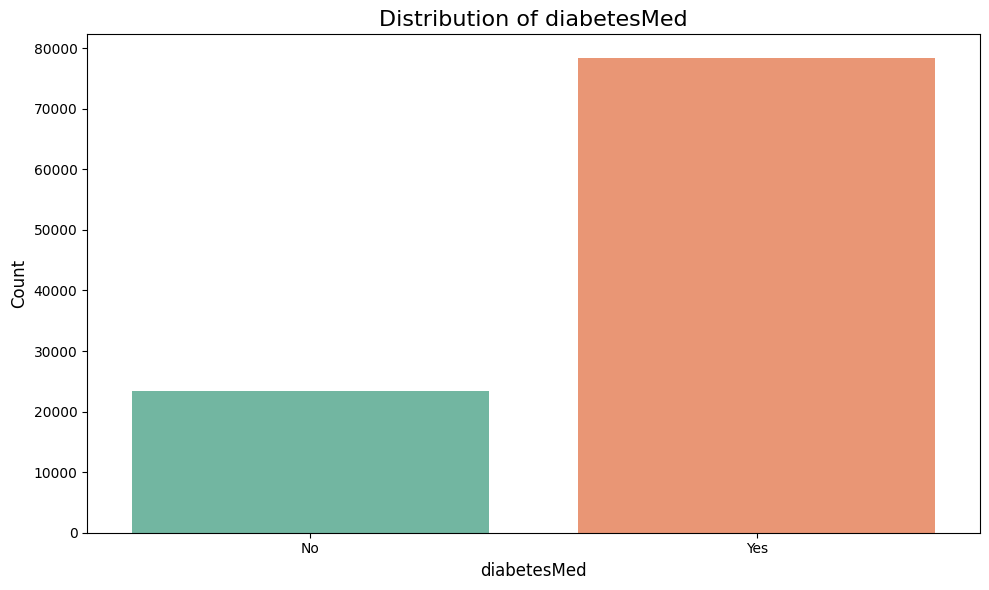

C:\Users\Dell\AppData\Local\Temp\ipykernel_28344\2247744841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


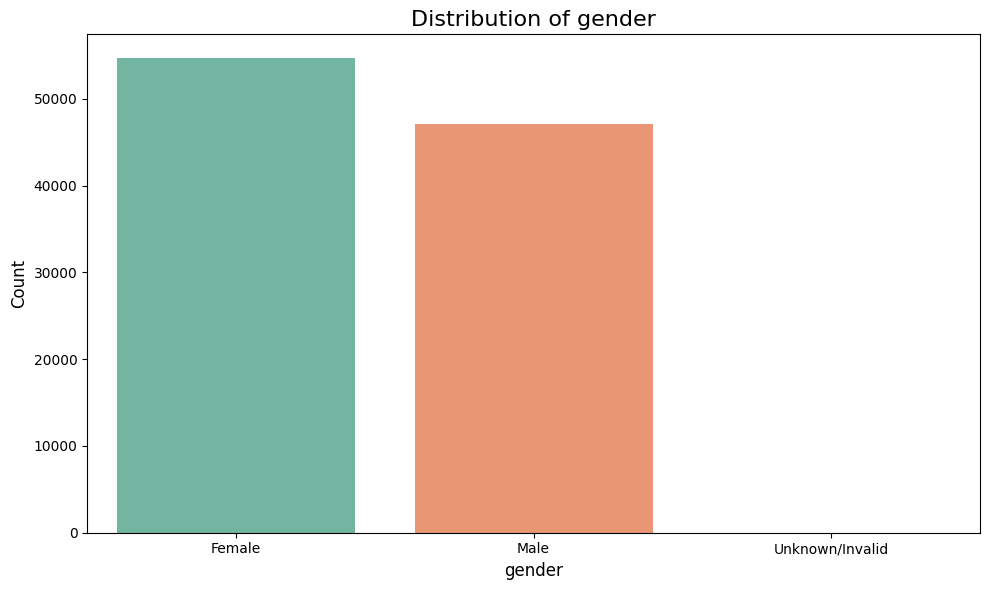

C:\Users\Dell\AppData\Local\Temp\ipykernel_28344\2247744841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


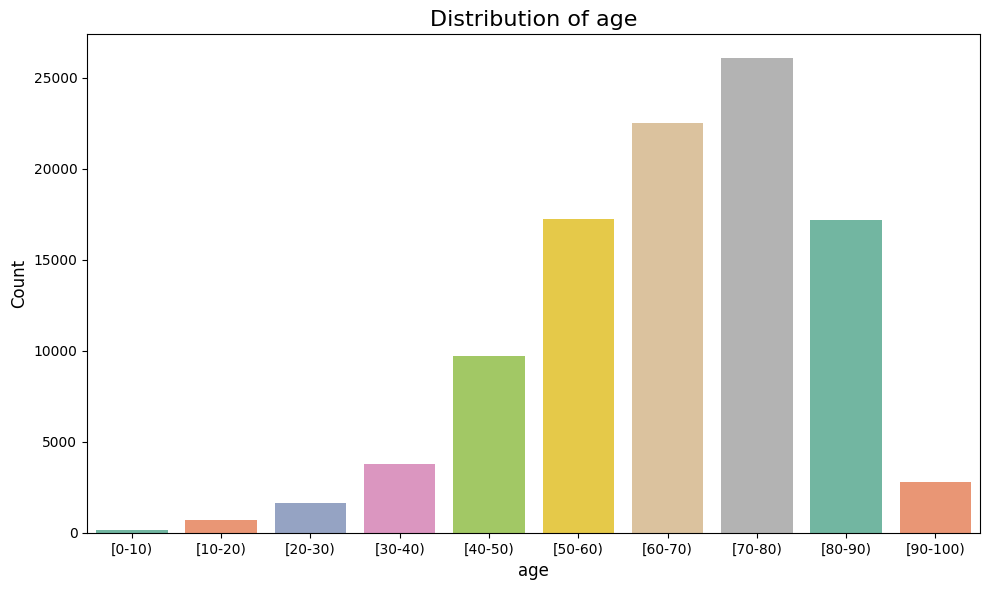

C:\Users\Dell\AppData\Local\Temp\ipykernel_28344\2247744841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


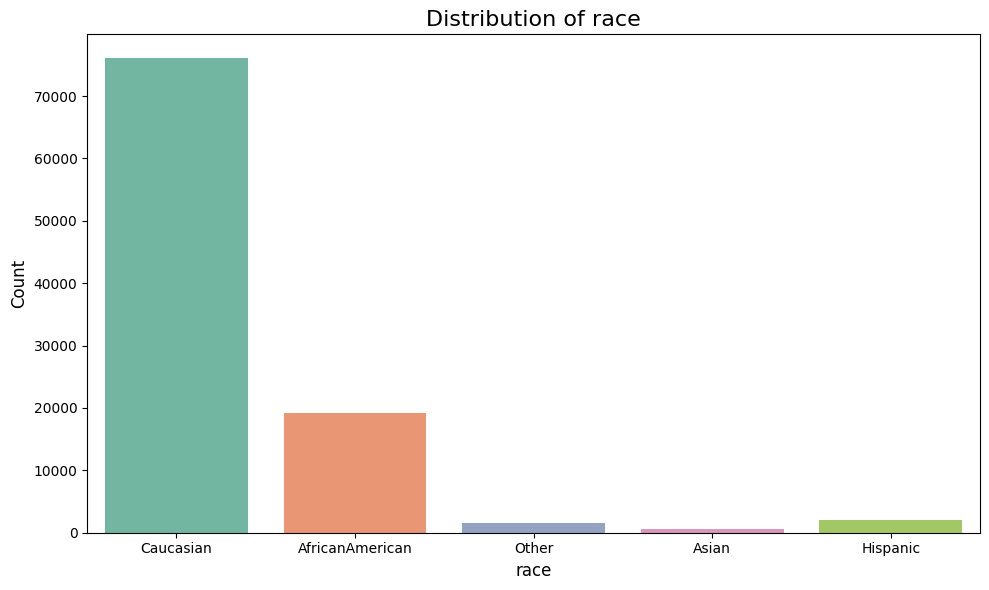

In [17]:
columns = ['diabetesMed', 'gender', 'age', 'race']
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, palette='Set2')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()
    plt.show()

## Bivariate Analysis

#### 1. Time in hospital vs Readmission

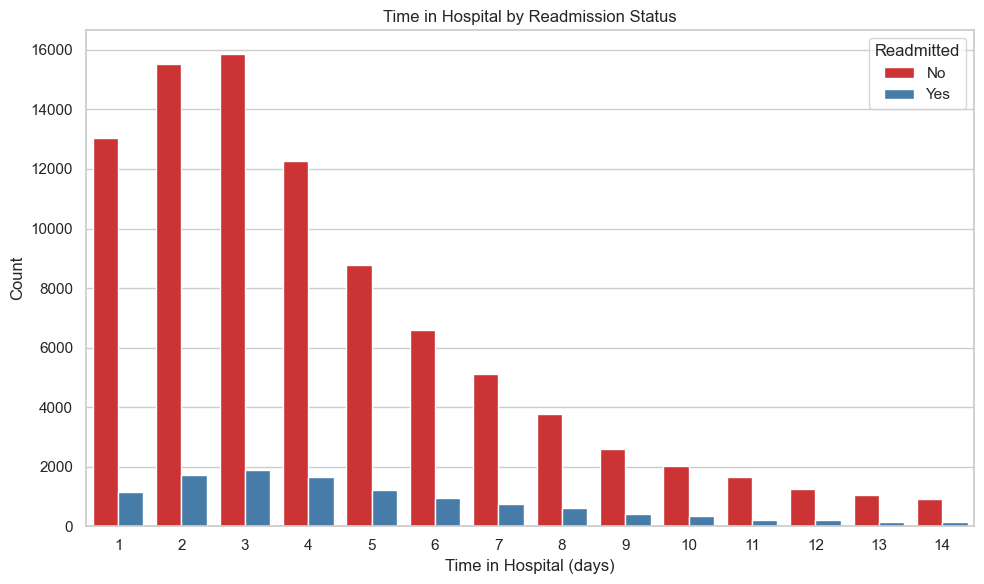

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='time_in_hospital', hue='readmitted', palette='Set1')
plt.title('Time in Hospital by Readmission Status', fontsize=16)
plt.xlabel('Time in Hospital (days)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Readmitted', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

- patient with early discharge have higher trend of readmission

#### 2. age vs readmission

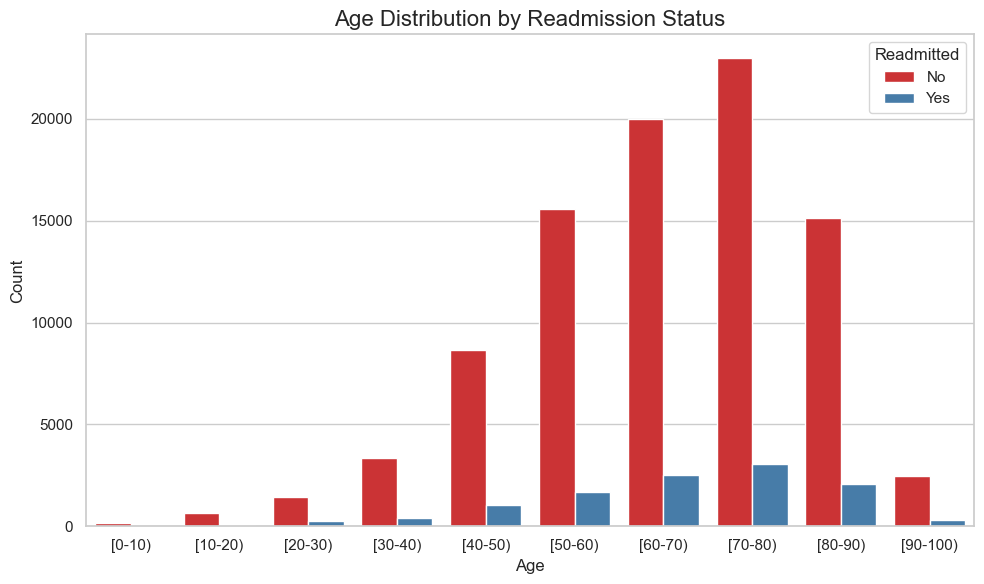

In [20]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age', hue='readmitted', palette='Set1')
plt.title('Age Distribution by Readmission Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Readmitted', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

- Patients with higher age have more readmission rate 

#### 3. Insulin vs readmission

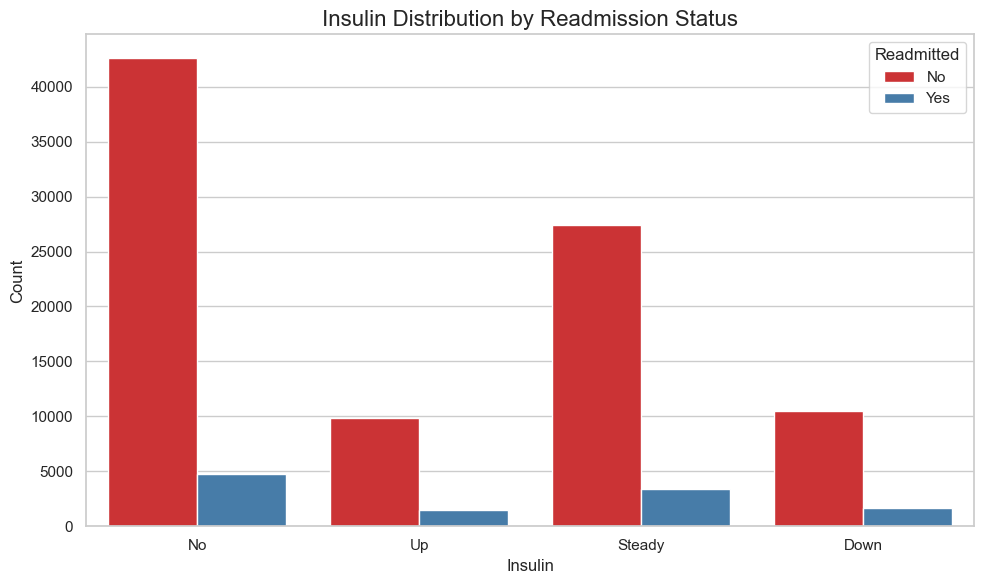

In [22]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='insulin', hue='readmitted', palette='Set1')
plt.title('Insulin Distribution by Readmission Status', fontsize=16)
plt.xlabel('Insulin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Readmitted', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

- Every class of insulin feature has a readmission , so its a important feature.

#### 4. Medication vs Readmission

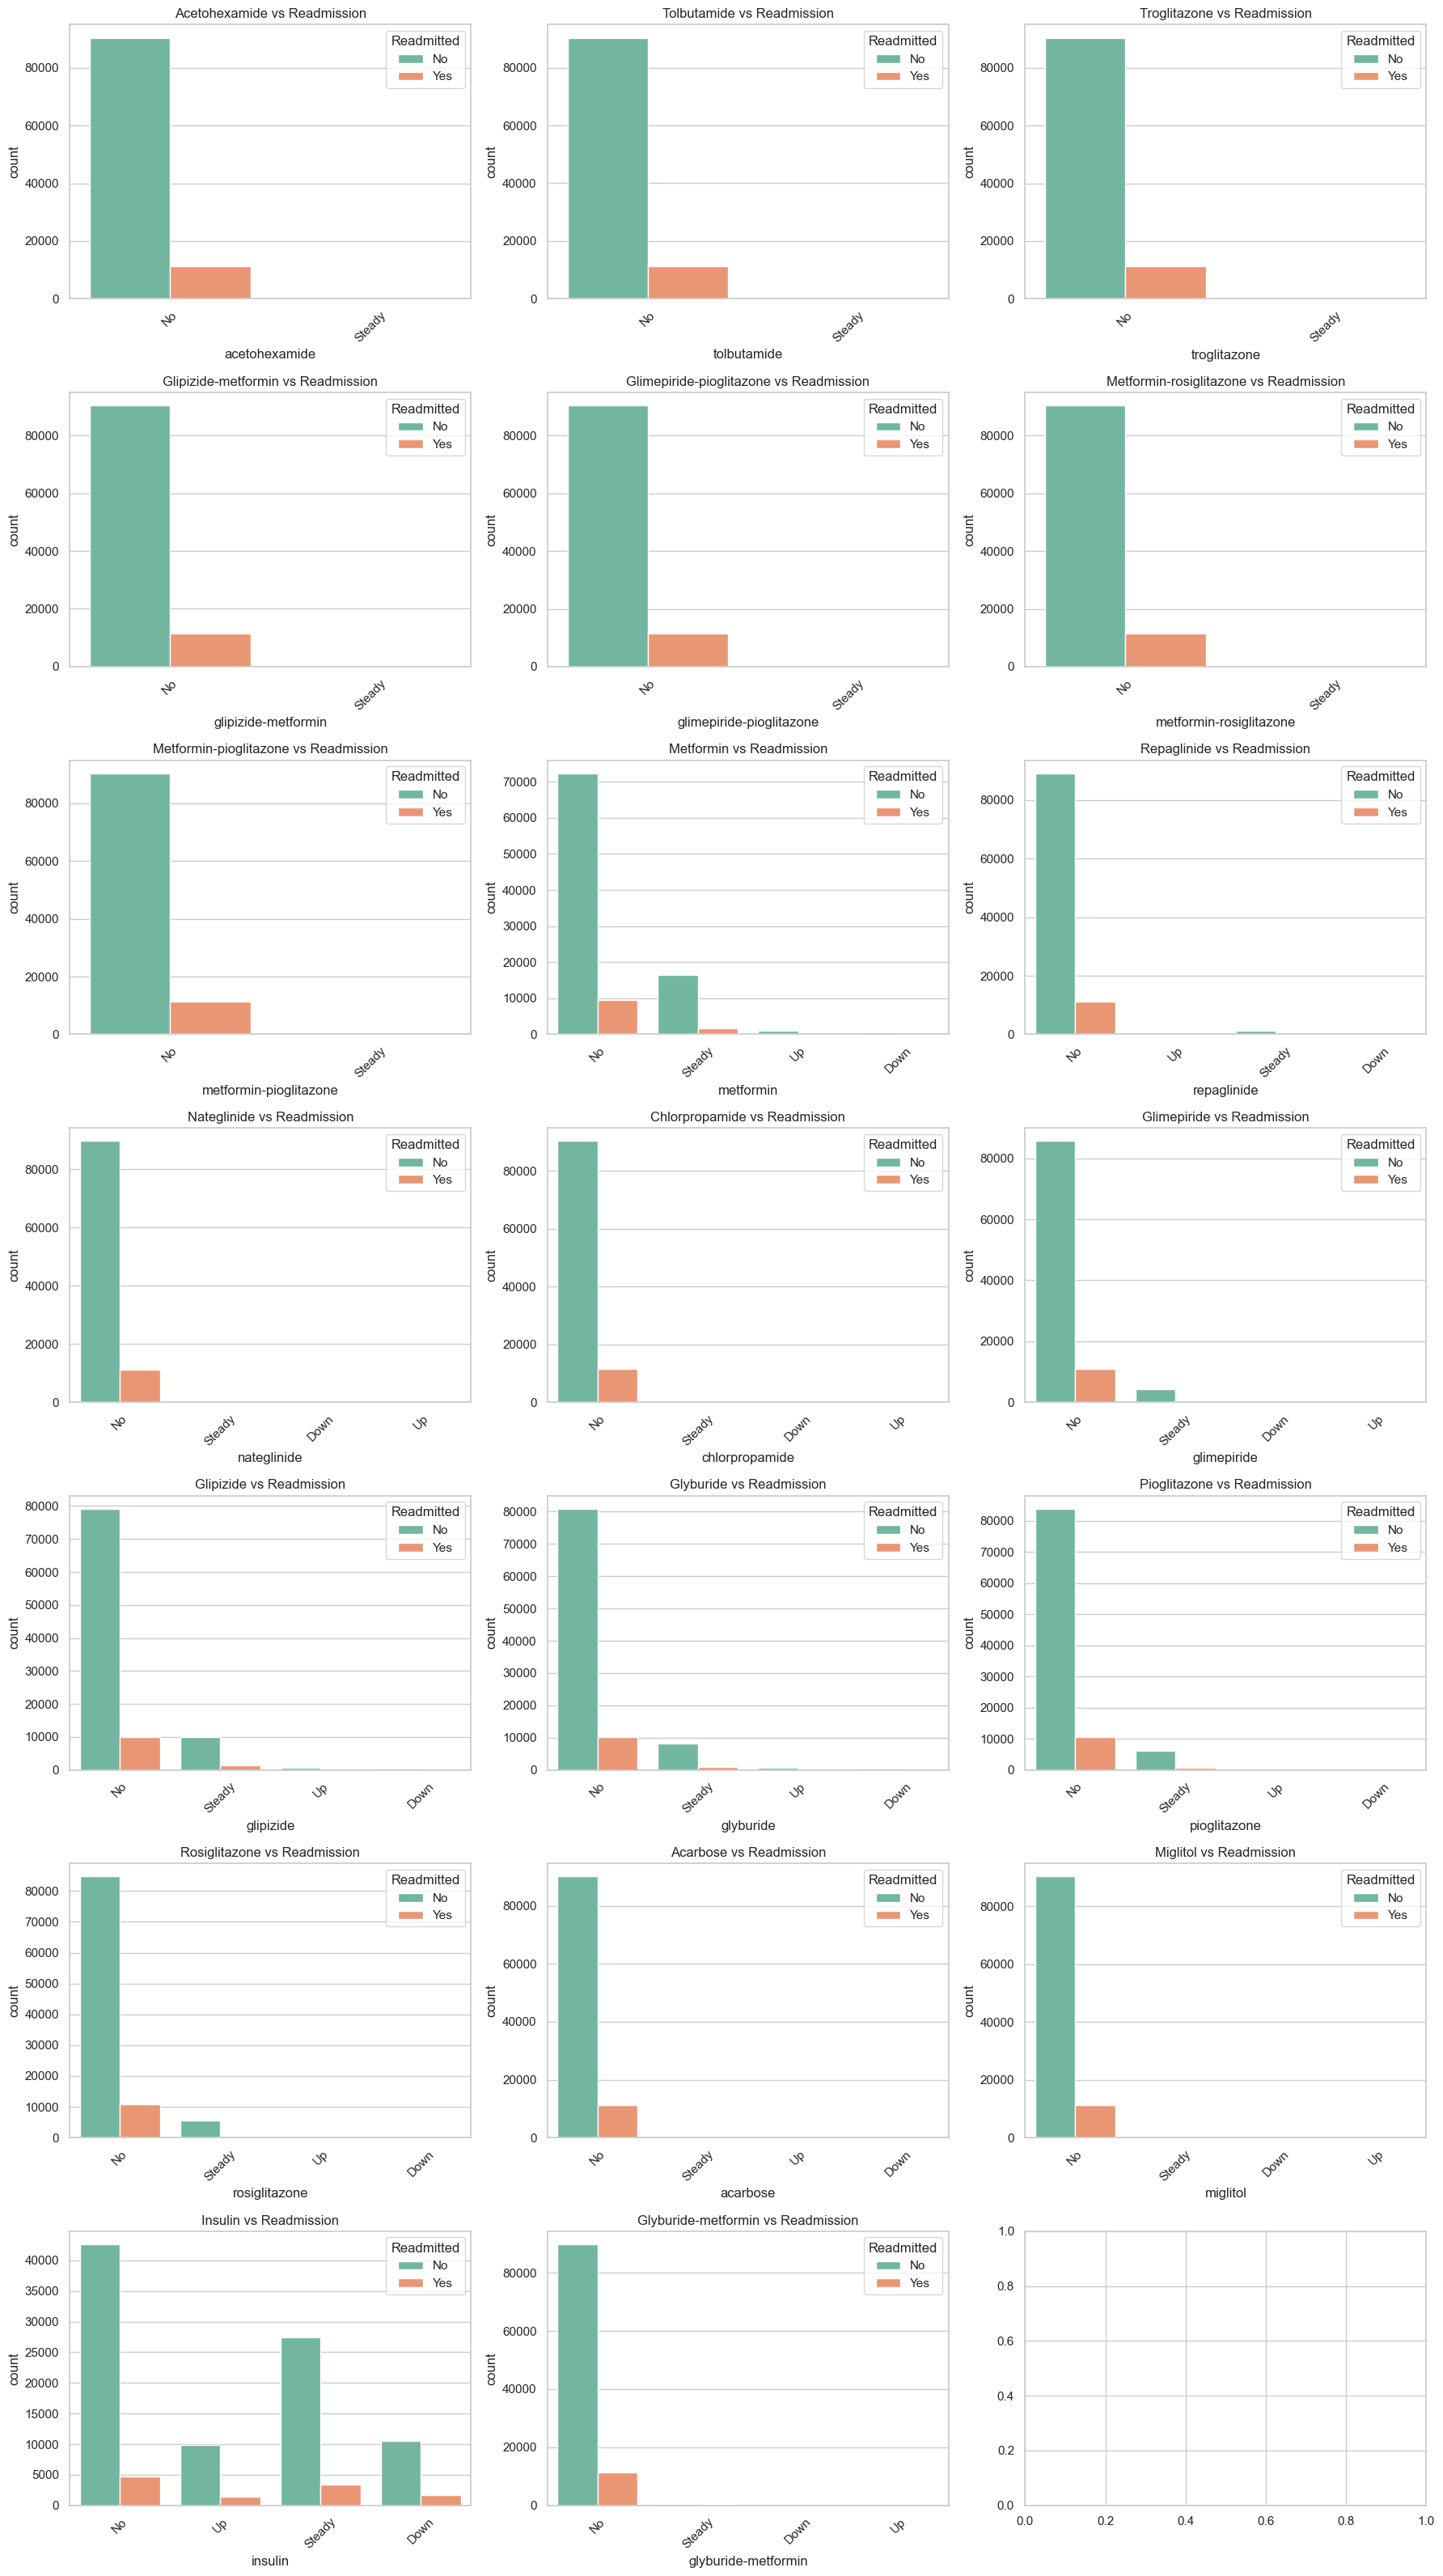

In [30]:
medication_columns = medication_columns_2 + medication_columns_4

# Create subplots
fig, axes = plt.subplots(7, 3, figsize=(18, 32))
axes = axes.flatten()  # flatten in case of multiple rows
# Plot each medication
for i, col in enumerate(medication_columns):
    sns.countplot(data=data, x=col, hue='readmitted', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col.capitalize()} vs Readmission')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Readmitted', loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

#### 5. Glucose test results and A1Cresults vs Readmission

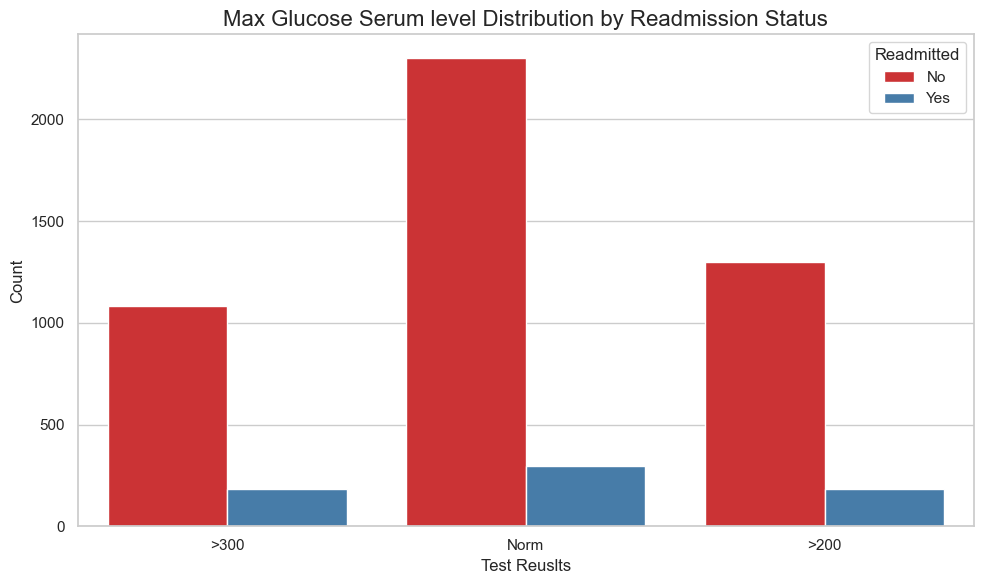

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='max_glu_serum', hue='readmitted', palette='Set1')
plt.title('Max Glucose Serum level Distribution by Readmission Status', fontsize=16)
plt.xlabel('Test Reuslts', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Readmitted', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

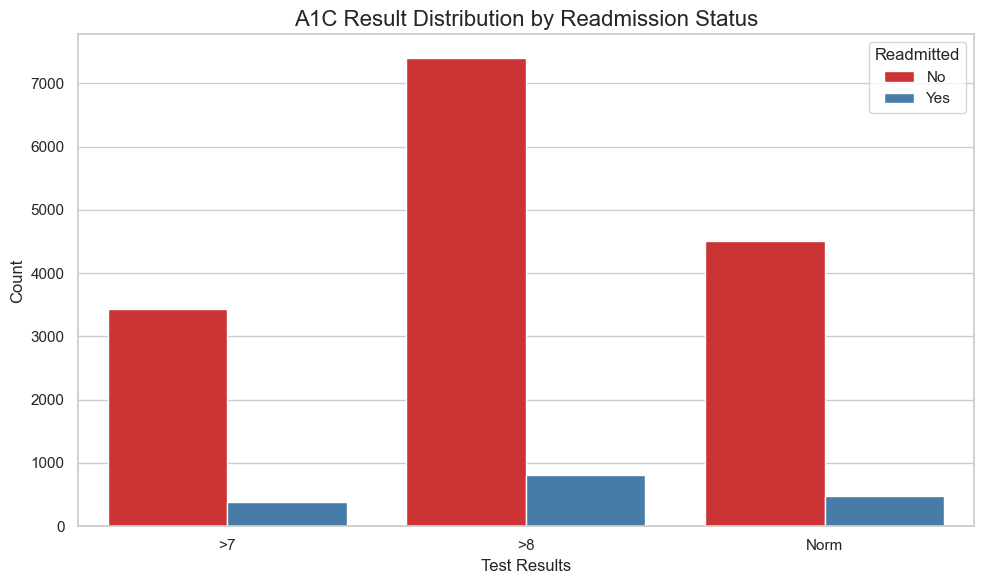

In [53]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='A1Cresult', hue='readmitted', palette='Set1')
plt.title('A1C Result Distribution by Readmission Status', fontsize=16)
plt.xlabel('Test Results', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Readmitted', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

- This feature has 80% null values but as per domain ,it plays vital role in readmission prediction. So we will impute none for nulls

#### 6. Numerical columns vs Readmission

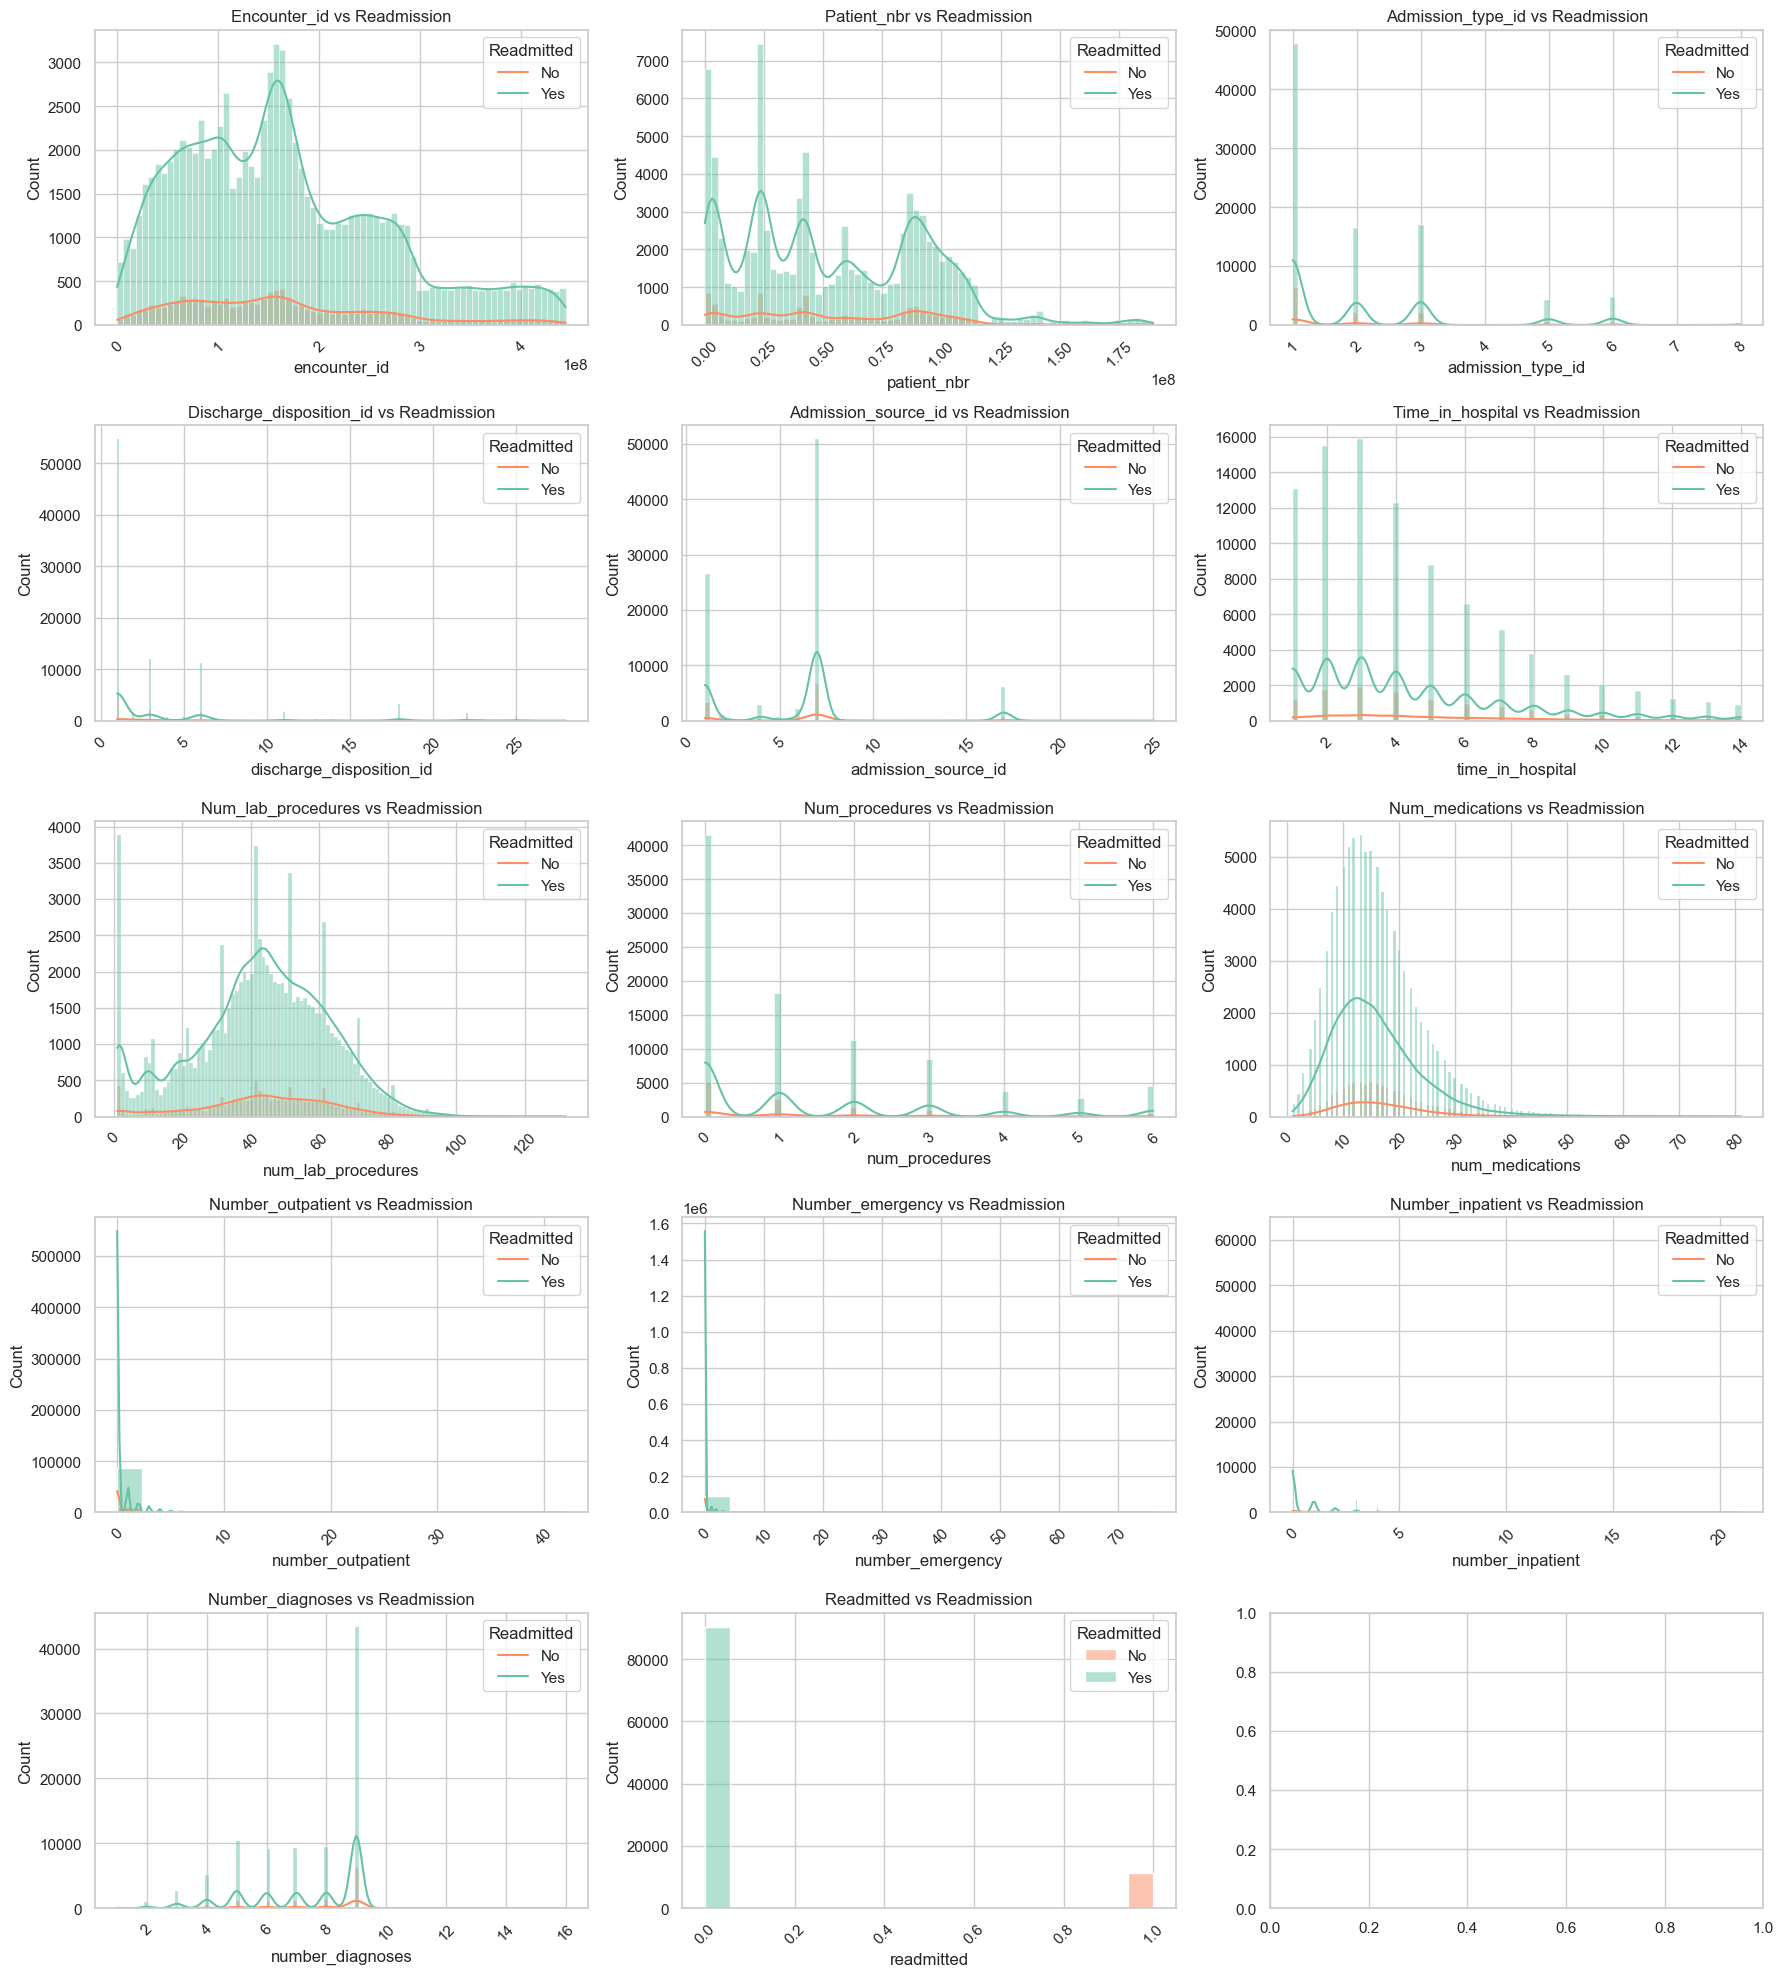

In [29]:
numerical_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()  # flatten in case of multiple rows
# Plot each medication
for i, col in enumerate(numerical_cols):
    sns.histplot(data=data, x=col, hue='readmitted', ax=axes[i], palette='Set2', kde=True)
    axes[i].set_title(f'{col.capitalize()} vs Readmission')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Readmitted', loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

#### Outliers detection for numerical columns

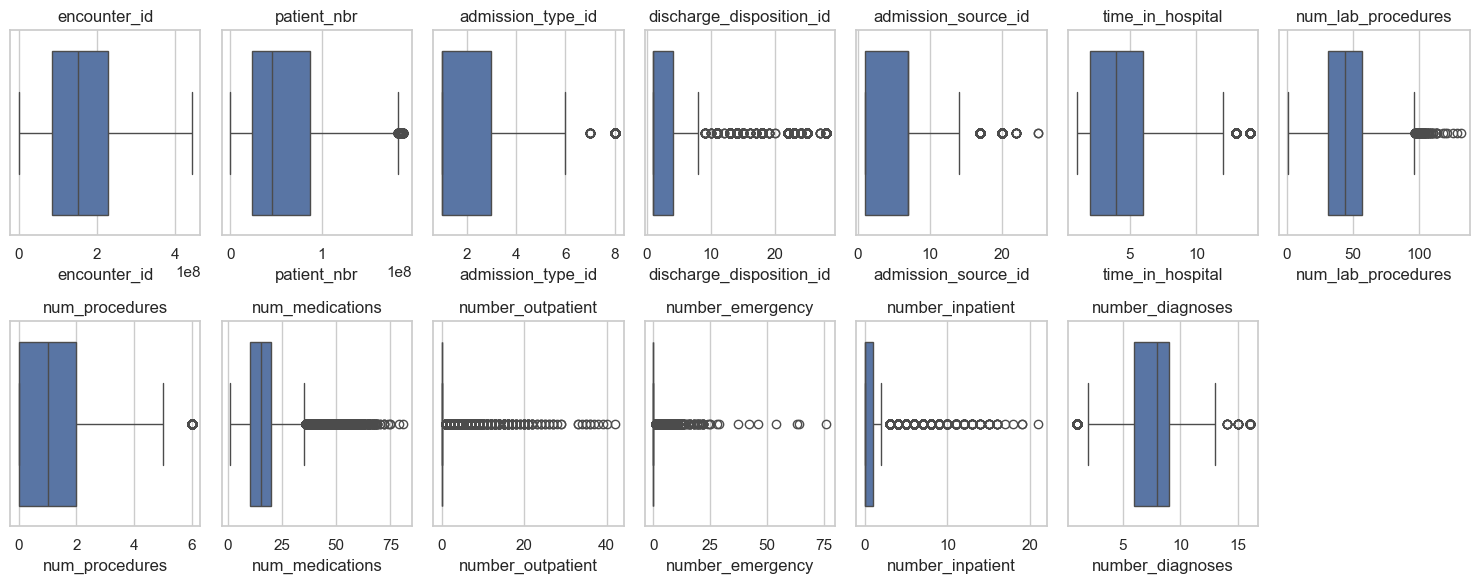

In [33]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('readmitted')  # Exclude target variable
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols)//2)+1, i)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


- Many numeric features (num_lab_procedures, num_medications, number_outpatient, number_emergency, number_inpatient) are right‑skewed with long tails and many outliers.
- time_in_hospital has a compact central range with a few larger values (outliers) 

In [58]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for each numerical column 
# Only considering those columns who don't have labels for another category
numerical_subset = [col for col in numerical_cols if col not in medication_columns]

# Removing this columns as they are identifiers and target variable
numerical_subset.remove('encounter_id')
numerical_subset.remove('patient_nbr')
numerical_subset.remove('admission_type_id')
numerical_subset.remove('discharge_disposition_id')
numerical_subset.remove('admission_source_id')
numerical_subset.remove('readmitted')

outlier_summary = {}
for col in numerical_subset:
    outliers = detect_outliers_iqr(data, col)
    outlier_summary[col] = len(outliers)

print(f"Outlier Summary:")
for col, count in outlier_summary.items():
    print(f" - {col}: {count} outliers")

Outlier Summary:
 - time_in_hospital: 2252 outliers
 - num_lab_procedures: 143 outliers
 - num_procedures: 4954 outliers
 - num_medications: 2557 outliers
 - number_outpatient: 16739 outliers
 - number_emergency: 11383 outliers
 - number_inpatient: 7049 outliers
 - number_diagnoses: 281 outliers
 - total_medications: 1397 outliers
 - num_med_changes: 113 outliers


- to handle this outliers we are gonna use log transformation

#### Corelation matrix

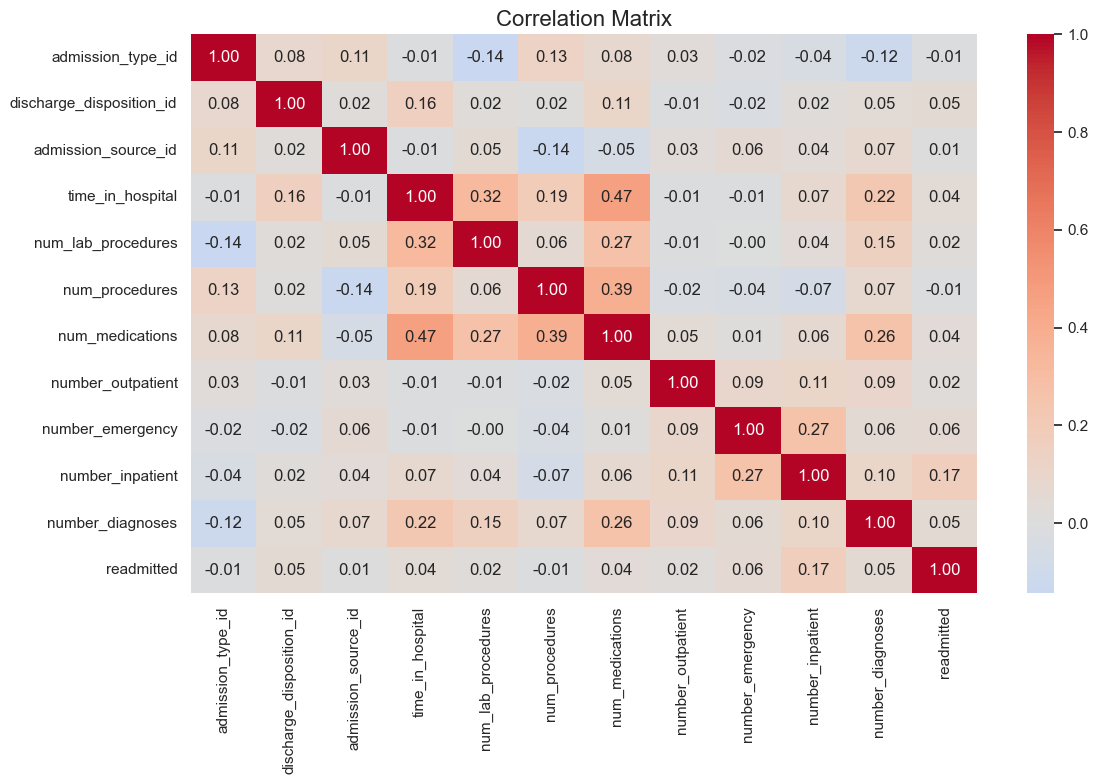

In [34]:
numerical_cols.remove('encounter_id')  # Exclude identifier
numerical_cols.remove('patient_nbr')  # Exclude identifier

# Correlation matrix
corr_matrix = data[numerical_cols + ['readmitted']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_28344\467724737.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_readmit, x='age', y='readmitted', palette='Set2')


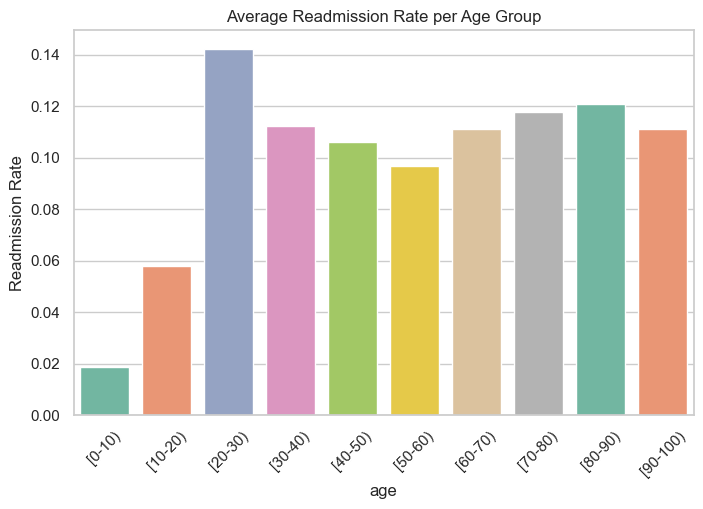

C:\Users\Dell\AppData\Local\Temp\ipykernel_28344\467724737.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=race_readmit, x='race', y='readmitted', palette='Set3')


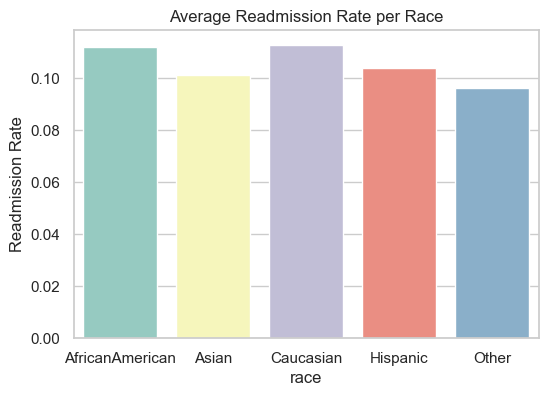

In [ ]:
# Example: Average readmission rate per age group
age_readmit = data.groupby('age')['readmitted'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=age_readmit, x='age', y='readmitted', palette='Set2')
plt.title("Average Readmission Rate per Age Group")
plt.ylabel("Readmission Rate")
plt.xticks(rotation=45)
plt.show()

# Example: Average readmission rate per race
race_readmit = data.groupby('race')['readmitted'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=race_readmit, x='race', y='readmitted', palette='Set3')
plt.title("Average Readmission Rate per Race")
plt.ylabel("Readmission Rate")
plt.show()


#### Maping medaction columns to check correlation 

In [37]:
# Encode 2-value meds: No → 0, Steady → 1
for col in medication_columns_2:
    data[col] = data[col].map({'No': 0, 'Steady': 1})

# Encode 4-value meds: No → 0, Steady → 1, Up → 2, Down → 3
med_encoding = {'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
for col in medication_columns_4:
    data[col] = data[col].map(med_encoding)

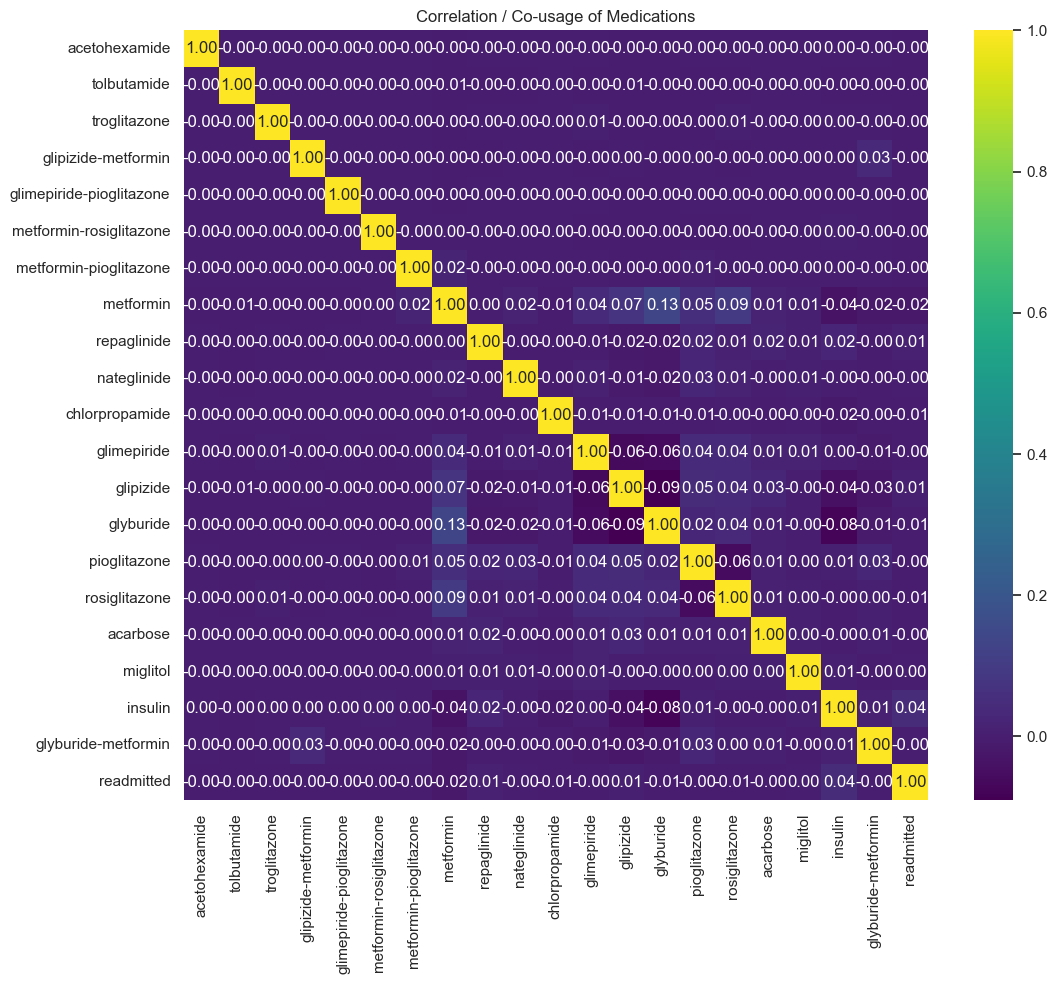

In [39]:
med_corr = data[medication_columns+['readmitted']].corr()

plt.figure(figsize=(12,10))
sns.heatmap(med_corr, annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation / Co-usage of Medications")
plt.show()

- All correlations are very small (between -0.02 and 0.04).
- Positive correlation → higher chance of readmission if patient used the medication.
- Negative correlation → lower chance of readmission if patient used the medication.
- Insulin shows the highest positive correlation (~0.04), but this is still very weak.
- Most other medications are almost uncorrelated with readmitted.

#### Pair Plots 

<Figure size 1500x500 with 0 Axes>

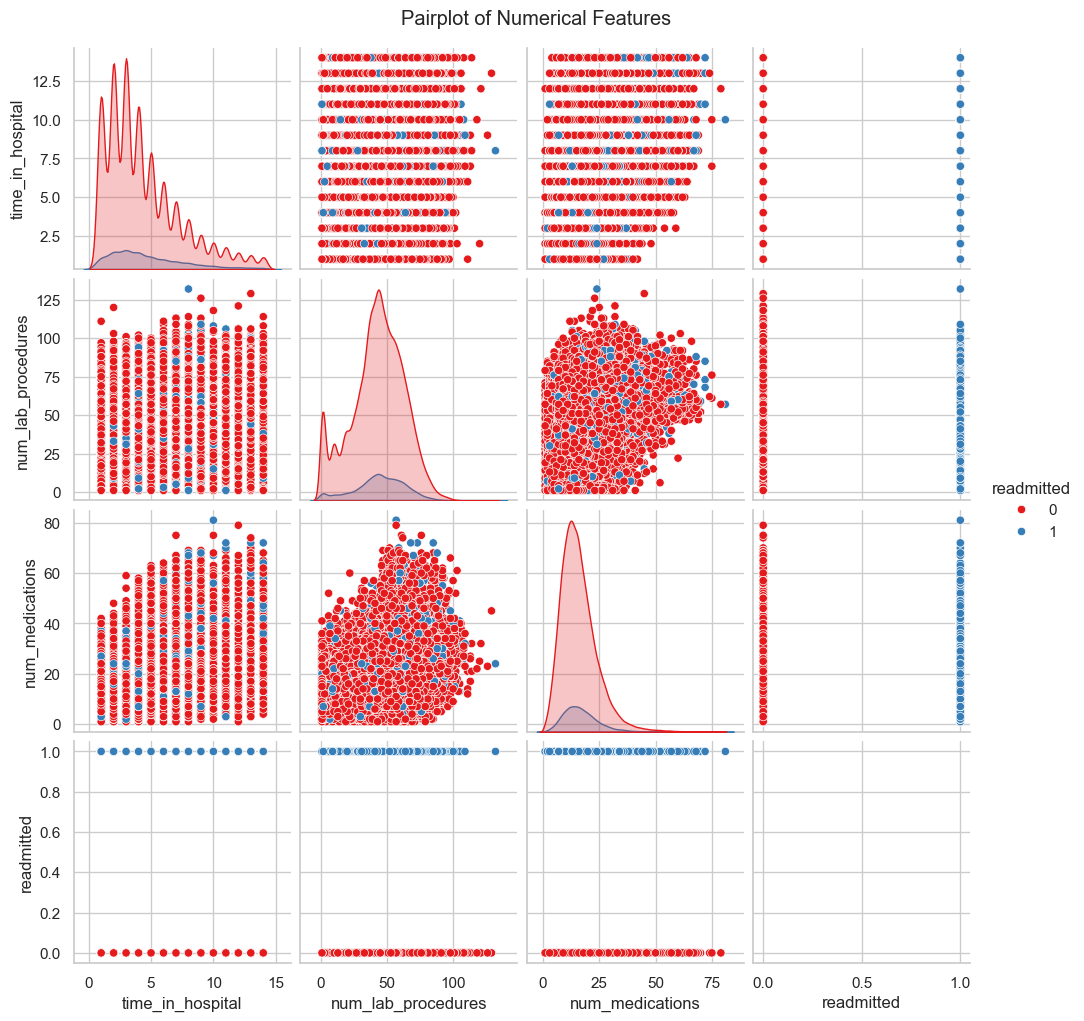

In [45]:
num_subset =  ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'readmitted']

plt.figure(figsize=(15, 5))
sns.pairplot(data=data, vars=num_subset, hue='readmitted', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

- No clear class separation — red (no) and blue (yes) points are heavily overlapped in every scatter and marginal KDE.
- Diagonals (KDEs) show similar shapes for both classes; the blue density is much smaller because the dataset is imbalanced.
- Weak signals only: readmitted cases appear slightly more frequent at very low time_in_hospital and slightly more spread toward higher num_medications / num_lab_procedures — but the differences are small.

### Principal Component Analysis to check the variance spread and dimensionality reduction

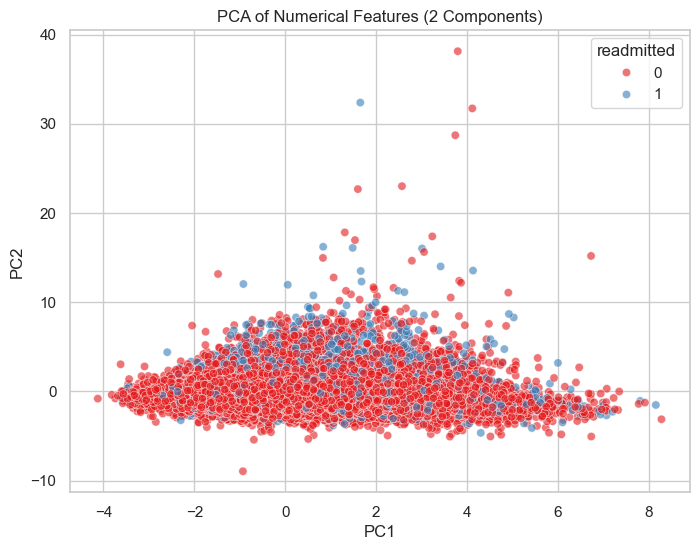

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_features = data[numerical_cols + medication_columns]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pca_features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['readmitted'] = data['readmitted']

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='readmitted', palette='Set1', alpha=0.6)
plt.title("PCA of Numerical Features (2 Components)")
plt.show()


- The high overlapping shows the hug variance in data.
- Dimension reduction is neccesary